Solution Exists: Following are the assigned colors
1 2 2 2 1


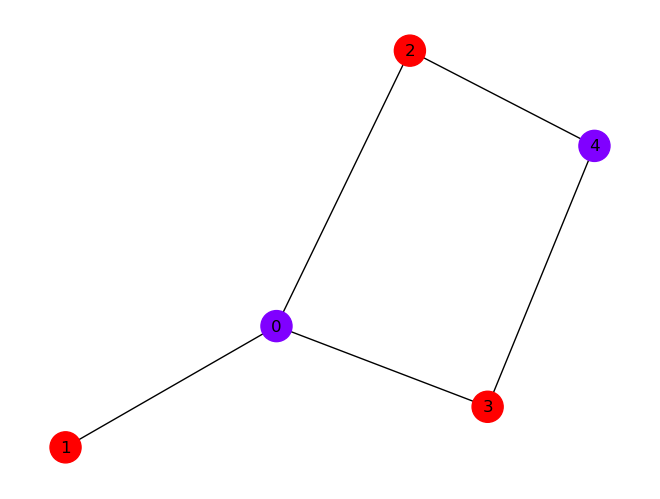

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Python Program for graph coloring using Backtracking
V = 5


def print_solution(color):
    print("Solution Exists: Following are the assigned colors")
    print(" ".join(map(str, color)))


def is_safe(v, graph, color, c):
    # Check if the color 'c' is safe for the vertex 'v'
    for i in range(V):
        if graph[v][i] and c == color[i]:
            return False
    return True


def graph_coloring_util(graph, m, color, v):
    # Base case: If all vertices are assigned a color, return true
    if v == V:
        return True

    # Try different colors for the current vertex 'v'
    for c in range(1, m + 1):
        # Check if assignment of color 'c' to 'v' is fine
        if is_safe(v, graph, color, c):
            color[v] = c

            # Recur to assign colors to the rest of the vertices
            if graph_coloring_util(graph, m, color, v + 1):
                return True

            # If assigning color 'c' doesn't lead to a solution, remove it
            color[v] = 0

    # If no color can be assigned to this vertex, return false
    return False


def graph_coloring(graph, m, edges):
    color = [0] * V

    # Call graph_coloring_util() for vertex 0
    if not graph_coloring_util(graph, m, color, 0):
        print("Solution does not exist")
        return False

    # Print the solution
    print_solution(color)
    draw_graph(edges, color)
    return True

def draw_graph(edges, color):
    # Create a graph object and add edges
    G = nx.Graph()
    G.add_edges_from(edges)
        
    # Draw the graph with spring layout and proper labels
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color=color, with_labels=True, node_size=500, cmap=plt.cm.rainbow)
    plt.show()

# Driver code
if __name__ == "__main__":
    graph = [
            [0, 1, 1, 1 ,0],
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [0, 1, 0, 1, 0],
    ]

    m = 3
    
    # Convert the adjacency matrix to a list of edges
    edges = [(i, j) for i in range(len(graph)) for j in range(i, len(graph)) if graph[i][j] == 1]
    
    # Function call
    graph_coloring(graph, m, edges)
